In [28]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, cohen_kappa_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('hour.csv')

#df.isnull().sum()
#df.columns
#df.describe()
df.head(3)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32


In [29]:
df.dteday = pd.to_datetime(df.dteday, yearfirst=True)
df.dteday = df.dteday.apply(lambda x: x.toordinal())

In [30]:
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,734138,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,734138,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,734138,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,734138,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,734138,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17374,17375,734868,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
17375,17376,734868,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
17376,17377,734868,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
17377,17378,734868,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [31]:
X = df.drop(['instant', 'casual', 'registered', 'cnt'], axis = 1)
y = df['cnt']
y = np.array(y)

In [32]:
# Scaling
#X_scaled = StandardScaler().fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 6)

In [8]:
# Logistic Regression
model_lr = LogisticRegression().fit(X_train, y_train)
model_lr_prediction = model_lr.predict(X_test)
lr_accuracy = accuracy_score(y_test, model_lr_prediction)
lr_accuracy

0.01534330648254699

In [9]:
kappa_lr = cohen_kappa_score(y_test, model_lr_prediction)
kappa_lr

0.0

In [33]:
# Decision Tree
model_dt = tree.DecisionTreeClassifier().fit(X_train, y_train)
model_dt_prediction = model_dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, model_dt_prediction)
dt_accuracy

0.023590333716915997

In [34]:
kappa_dt = cohen_kappa_score(y_test, model_dt_prediction)
kappa_dt

0.02037884872434348

Maximum:  0.03222094361334868
Mean:  0.02008154666892928


<AxesSubplot:>

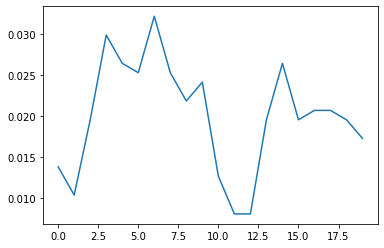

In [12]:
# K-Fold DecisionTree
dt_plot = cross_val_score(tree.DecisionTreeClassifier(max_depth = 5), X, y, cv=20)
print('Maximum: ', dt_plot.max())
#cvs_dt = cross_val_score(tree.DecisionTreeClassifier(max_depth = 7), X, y, cv=10).mean()
print('Mean: ', dt_plot.mean())
dt_plot = pd.Series(dt_plot)
dt_plot.plot()

In [35]:
# KNN
model_knn = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski', p = 2).fit(X_train, y_train)
model_knn_prediction = model_knn.predict(X_test)
knn_accuracy = accuracy_score(y_test, model_knn_prediction)
knn_accuracy

0.021288837744533946

In [36]:
kappa_knn = cohen_kappa_score(y_test, model_knn_prediction)
kappa_knn

0.017192038569952217

In [25]:
# SVM computes forever - DOESN'T WORK!
# model_svm = SVC(kernel='linear').fit(X_train, y_train)
# model_svm_prediction = model_svm.predict(X_test)
# svm_accuracy = accuracy_score(y_test, model_svm_prediction)
# svm_accuracy

In [ ]:
# kappa_svm = cohen_kappa_score(y_test, model_svm_prediction)
# kappa_svm

In [40]:
model_svm2 = SVC(kernel='poly').fit(X_train, y_train)
model_svm2_prediction = model_svm2.predict(X_test)
svm2_accuracy = accuracy_score(y_test, model_svm2_prediction)
svm2_accuracy

0.01534330648254699

In [41]:
kappa_svm2 = cohen_kappa_score(y_test, model_svm2_prediction)
kappa_svm2

0.0

In [23]:
print(classification_report(y_test,model_svm2_prediction))

   0.00         5
         347       0.00      0.00      0.00         7
         348       0.00      0.00      0.00         1
         349       0.00      0.00      0.00         9
         350       0.00      0.00      0.00         6
         351       0.00      0.00      0.00         6
         352       0.00      0.00      0.00         3
         353       0.00      0.00      0.00         2
         354       0.00      0.00      0.00         5
         355       0.00      0.00      0.00         6
         356       0.00      0.00      0.00         3
         357       0.00      0.00      0.00         2
         358       0.00      0.00      0.00         4
         359       0.00      0.00      0.00         3
         360       0.00      0.00      0.00         5
         361       0.00      0.00      0.00         6
         362       0.00      0.00      0.00         3
         363       0.00      0.00      0.00         6
         364       0.00      0.00      0.00         1
         3

In [42]:
model_svm3 = SVC(kernel='rbf').fit(X_train, y_train)
model_svm3_prediction = model_svm3.predict(X_test)
svm3_accuracy = accuracy_score(y_test, model_svm3_prediction)
svm3_accuracy

0.01534330648254699

In [43]:
kappa_svm3 = cohen_kappa_score(y_test, model_svm3_prediction)
kappa_svm3

0.0

In [59]:
print(classification_report(y_test,model_svm3_prediction))

In [38]:
# Random Forest
model_rf = RandomForestClassifier(n_estimators=50).fit(X_train, y_train)
model_rf_prediction = model_rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, model_rf_prediction)
rf_accuracy

0.02243958573072497

In [39]:
kappa_rf = cohen_kappa_score(y_test, model_rf_prediction)
kappa_rf

0.019043812221807732

<AxesSubplot:>

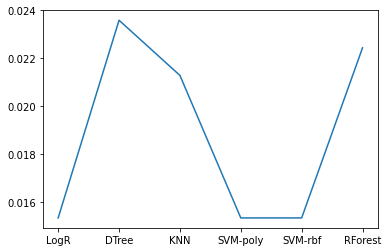

In [45]:
acc = [lr_accuracy, dt_accuracy, knn_accuracy, svm2_accuracy, svm3_accuracy, rf_accuracy]
acc = pd.Series(acc)

exploration_methods = ['LogR', 'DTree', 'KNN', 'SVM-poly', 'SVM-rbf', 'RForest']
plt.xticks(np.arange(6) , exploration_methods, rotation = 'vertical')
acc.plot()

<AxesSubplot:>

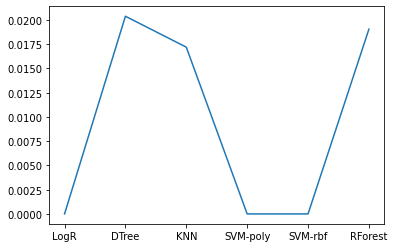

In [47]:
kappa_overview = [kappa_lr, kappa_dt, kappa_knn, kappa_svm2, kappa_svm3, kappa_rf]
kappa_overview = pd.Series(kappa_overview)

plt.xticks(np.arange(6), exploration_methods, rotation='45')
kappa_overview.plot()

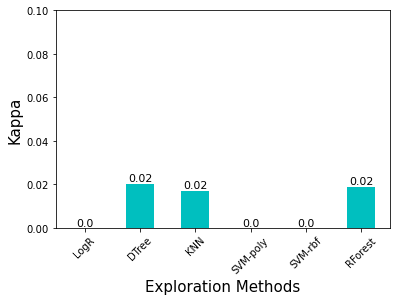

In [50]:
plt.bar(x=exploration_methods, height = kappa_overview, color = 'c', width = 0.5)
#plt.grid()
#plt.title('Efficiency of Machine Learning in Prediction of Quality by Chemical Measures')
plt.xlabel('Exploration Methods', fontsize=15)
plt.ylabel('Kappa', fontsize=15)
plt.xticks(rotation=45)
plt.ylim(0, 0.1)

for i in range(6):
  plt.text(
      x = i, 
      y = kappa_overview[i], 
      s = round(kappa_overview[i], 2), 
      horizontalalignment='center',
      verticalalignment='bottom',
      size = 11)

plt.show()